In [1]:
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
import numpy as np


# Problem 1

Complete the following fuction, implementing anisotropic diffusion for black and
white images using the following boundary conditions:
For the top edge let
\begin{align*}
U^{n+1}_{l,m} = U^n_{l,m}+&\lambda(g(|U^n_{l−1,m} − U^n_{l,m}|)(U^n_{l−1,m} − U^n_{l,m})\\
&+ g(|U^n_{l+1,m} − U^n_{l,m}|)(U^n_{l+1,m} − U^n_{l,m})\\
&+ g(|U^n_{l,m+1} − U^n_{l,m}|)(U^n_{l,m+1} − U^n_{l,m}))
\end{align*}
Do the other edges similarly.
For the top left corner let
\begin{align*}
U^{n+1}_{l,m} = U^n_{l,m}+&λ(g(|U^n_{l+1,m} − U^n_{l,m}|)(U^n_{l+1,m} − U^n_{l,m})
+ \\ &g(|U^n_{l,m+1} − U^n_{l,m}|)(U^n_{l,m+1} − U^n_{l,m}))
\end{align*}
Do the other corners similarly.
Essentially we are just using the terms of the difference scheme that are actually defined.
In your function, use
$$g(x) = e^{-(\frac{x}{\sigma} )^2}$$


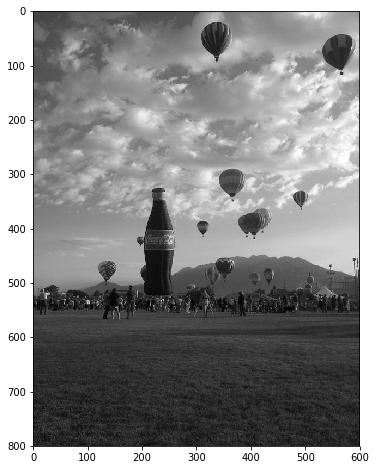

In [2]:
picture = imread('balloon.jpg',as_gray=True) * 1./255
plt.figure(figsize=(10,8))
plt.imshow(picture, cmap=cm.gray)
plt.show()

In [3]:

def anisdiff_bw(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    for _ in range(N):
        # construct Padded U, making the edge cases a breeze
        padU = np.pad(U,(1,1),'edge')
        
        # Apply the diffusion formula to U
        U = padU[1:-1,1:-1] + lambda_ * (
                g(abs(padU[:-2,1:-1] - padU[1:-1,1:-1]))*(padU[:-2,1:-1] - padU[1:-1,1:-1]) +
                g(abs(padU[2:,1:-1] - padU[1:-1,1:-1]))*(padU[2:,1:-1] - padU[1:-1,1:-1]) +
                g(abs(padU[1:-1,:-2] - padU[1:-1,1:-1]))*(padU[1:-1,:-2] - padU[1:-1,1:-1]) +
                g(abs(padU[1:-1,2:] - padU[1:-1,1:-1]))*(padU[1:-1,2:] - padU[1:-1,1:-1]) 
            )
    return U
        
    

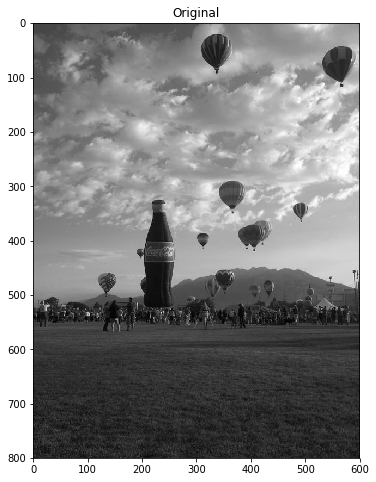

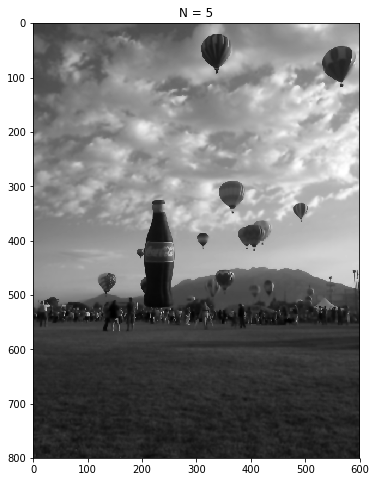

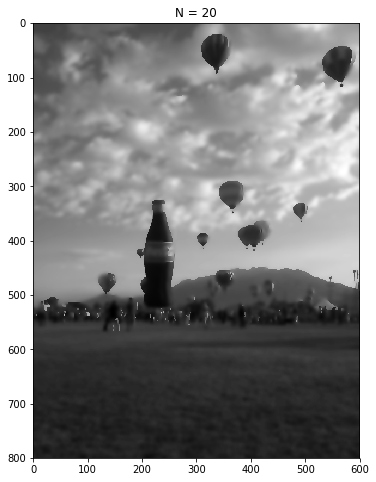

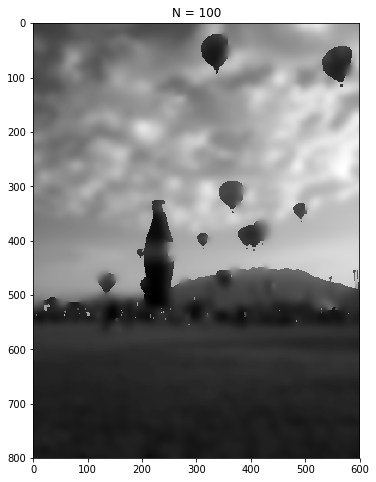

In [4]:
# run code to test anisdiff_bw function
lambda_ = .25
Ns = [5,20,100]
g = lambda x : np.exp(-(x/.1)**2)

# Show original image
plt.figure(figsize=(10,8))
plt.imshow(picture, cmap='gray')
plt.title("Original")
plt.show()

# run blurring and show image for each value of N
for N in Ns:
    plt.figure(figsize=(10,8))
    plt.imshow(anisdiff_bw(picture, N, lambda_, g),cmap='gray')
    plt.title("N = {}".format(N))
    plt.show()

# Problem 2

Complete the following function to process a colored image. You may modify
your colde from the previous problem. Measure the difference between pixels using the 2-norm.
Use the corresponding vector versions of the boundary conditions given in Problem 1.

Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.
Hint: If you have an m×n×3 matrix representing the RGB dierences of each pixel, then
to nd a matrix representing the norm of the dierences, you can use the following code. This
code squares each value and sums along the last axis, and takes the square root. In order to
keep the dimension size of the matrix and aid in broadcasting, you must use keepdims=True

In [5]:
def anisdiff_color(U, N, lambda_, sigma):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    norm = lambda U : np.sqrt(np.sum(U**2, axis=2, keepdims=True))
    
    for _ in range(N):
        # construct Padded U, making the edge cases a breeze
        padU = np.pad(U,((1,1),(1,1),(0,0)),'edge')
        
        # Apply the diffusion formula to U
        U = padU[1:-1,1:-1] + lambda_ * (
                g(norm(padU[:-2,1:-1] - padU[1:-1,1:-1]))*(padU[:-2,1:-1] - padU[1:-1,1:-1]) +
                g(norm(padU[2:,1:-1] - padU[1:-1,1:-1]))*(padU[2:,1:-1] - padU[1:-1,1:-1]) +
                g(norm(padU[1:-1,:-2] - padU[1:-1,1:-1]))*(padU[1:-1,:-2] - padU[1:-1,1:-1]) +
                g(norm(padU[1:-1,2:] - padU[1:-1,1:-1]))*(padU[1:-1,2:] - padU[1:-1,1:-1]) 
            )
    return U
    

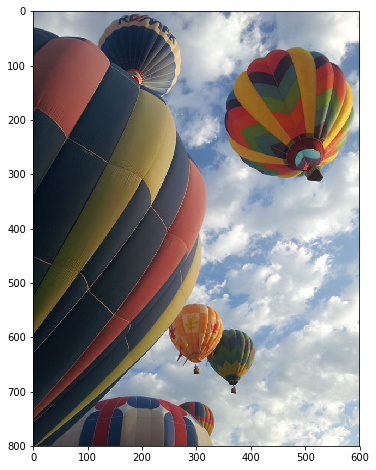

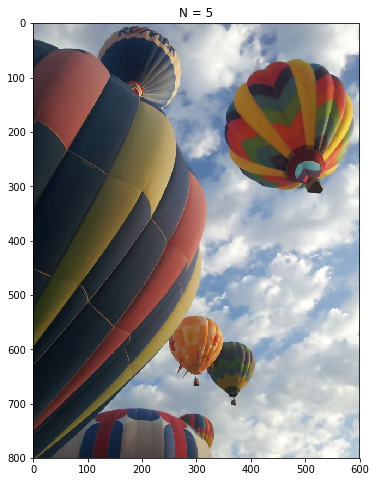

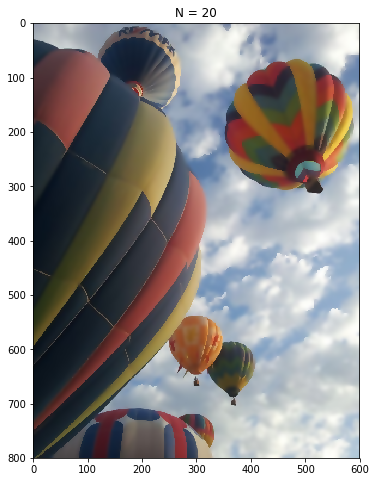

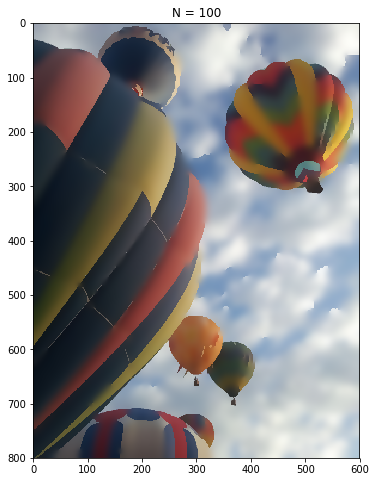

In [6]:
# run code to test anisdiff_color function
balloon = imread('balloons_color.jpg') * 1./255
plt.figure(figsize=(10,8))
plt.imshow(balloon)
plt.show()

# run blurring and show image for each value of N
for N in Ns:
    plt.figure(figsize=(10,8))
    plt.imshow(anisdiff_color(balloon, N, lambda_, g))
    plt.title("N = {}".format(N))
    plt.show()


# Problem 3

Use the given code to add noise to your grayscale image.

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diffusion does not smooth out the
noise.

Hint: don't forget to rescale

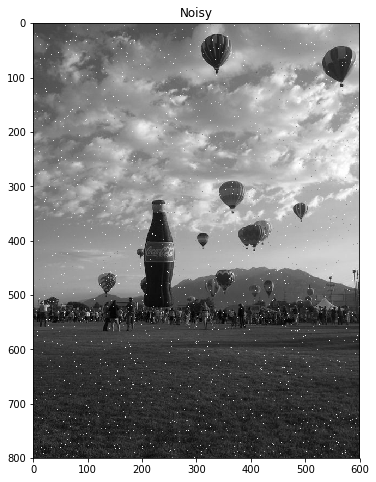

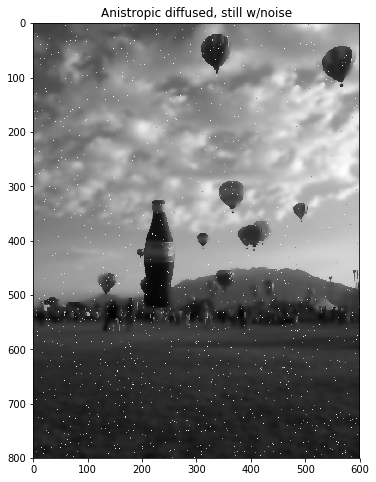

In [8]:
# use the following code to add noise to your grayscale image
from numpy.random import randint
image = imread('balloon.jpg', as_gray=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)
    


# don't forget to rescale
image *= 1./ 255

# display original and noisy image
plt.figure(figsize=(10,8))
plt.imshow(image, cmap='gray')
plt.title("Noisy")
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(anisdiff_bw(image,20,lambda_,g),cmap='gray')
plt.title("Anistropic diffused, still w/noise")
plt.show()

### Anisotropic diffusion does not smooth out the noise because the contrast between the noise and the background is so great that our g() function causes the diffusion to be low